# Loan Eligibility prediction using Machine Learning Models in Python

I will develop a model that can predict whether  or not one can get a loan aproval.  the model will use past data of the applicant and information like gender, marital status and income etc to predict their probability of getting a loan

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# Using this to load the file from my External Hard drive AND Saving it to Uploaded
from google.colab import files
uploaded = files.upload()


Saving loan_data.csv to loan_data.csv


In [3]:
# I will use this io.BytesIO(uploaded['loan_data.csv']) to read the csv file from the io that i uploaded the file.
import io
df = pd.read_csv(io.BytesIO(uploaded['loan_data.csv']),encoding = 'latin-1').dropna(axis = 1)
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [4]:
## Shape of the dataset
df.shape

(577, 5)

In [5]:
# Info() About the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


To get values like the mean, count and min of the column

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,577.0,5297.119584,5853.236196,150.0,2889.0,3800.0,5746.0,81000.0
LoanAmount,577.0,144968.804159,82704.181660,9000.0,100000.0,127000.0,167000.0,650000.0


### Exploratory Data Analysis

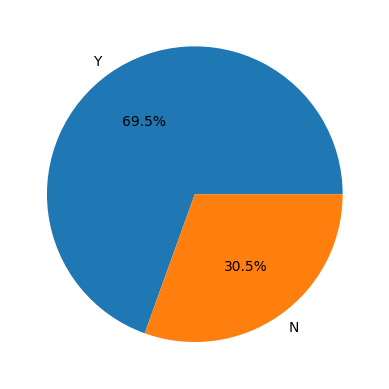

In [7]:
# Plot the piechart of loanStatus column
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = '%1.1f%%')
plt.show()

we have an imbalanced Dataset. I will have to balance it before training.

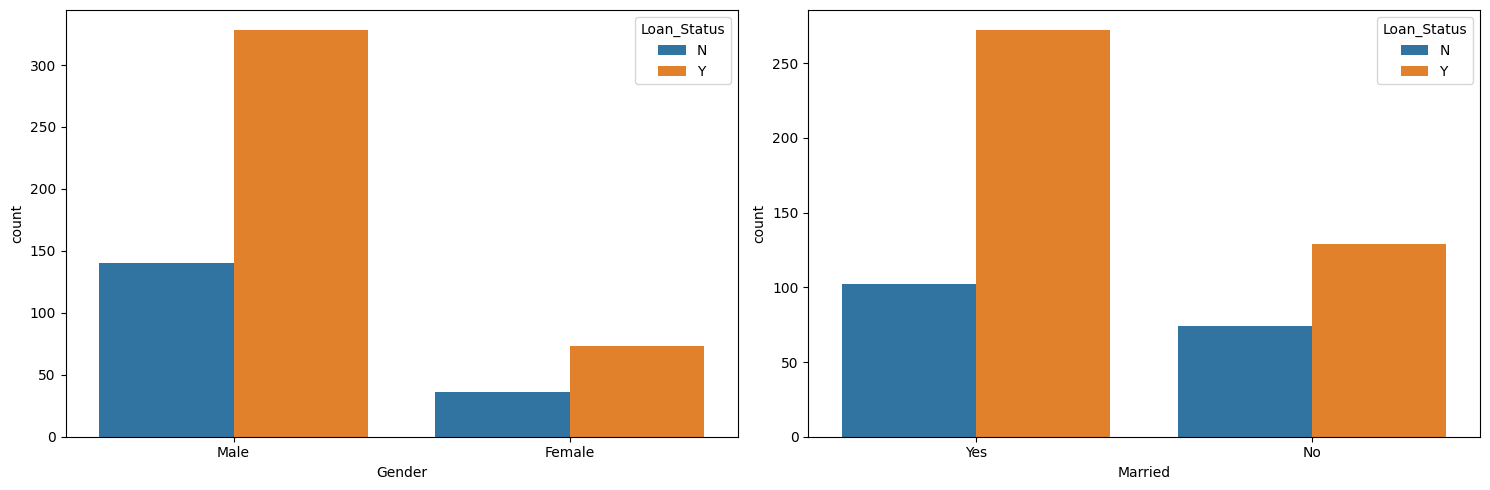

In [8]:
# I will Plot a CountPlot
plt.subplots(figsize = (15, 5))
for i, col in enumerate(['Gender','Married']):
  plt.subplot(1, 2, i+1)
  sns.countplot(data = df, x = col, hue ='Loan_Status')

plt.tight_layout()
plt.show()

one observation we can see is that  Chances of getting a loan approved for married  people is quite low

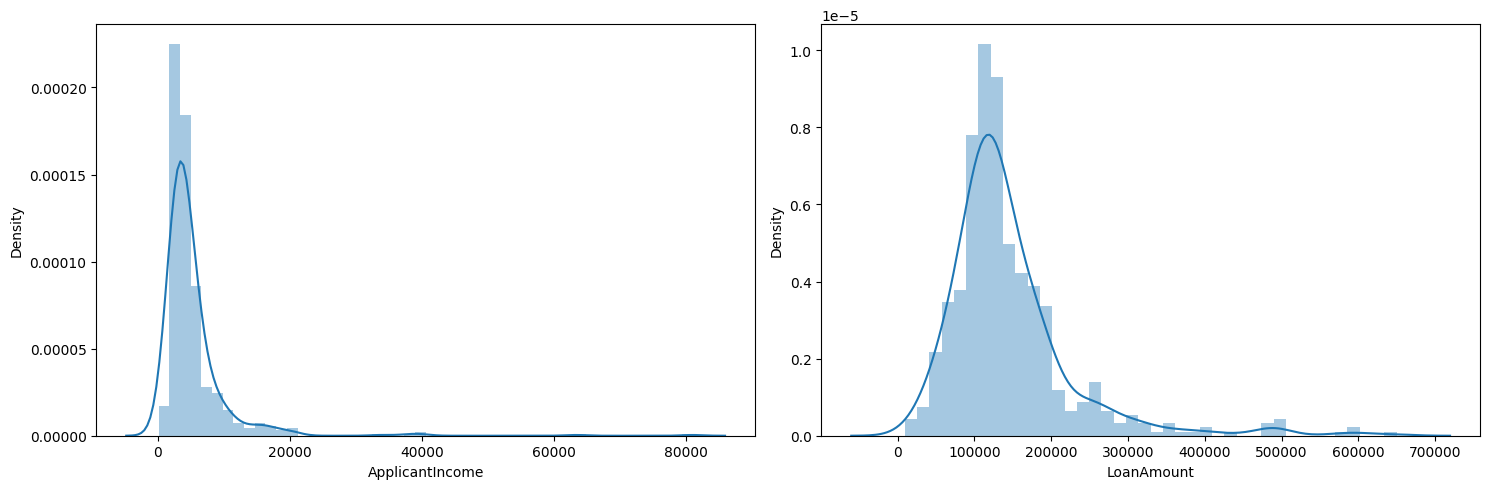

In [9]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
  plt.subplot(1, 2, i+1)
  sns.distplot(df[col])

plt.tight_layout()
plt.show()


Now to get the Outliers we use Boxplot

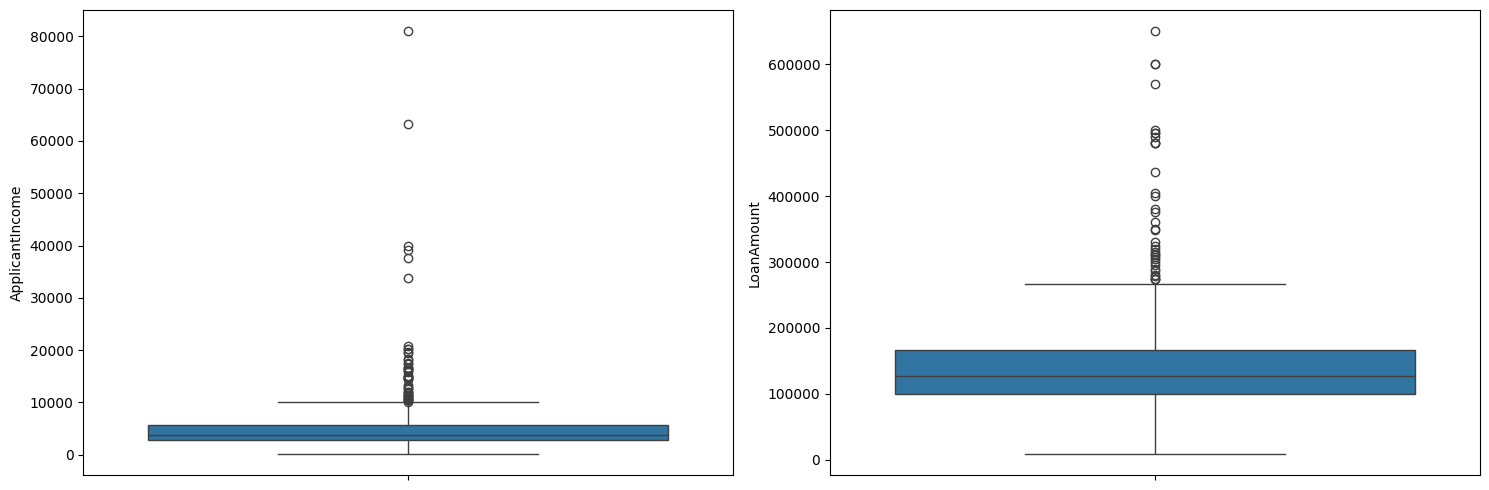

In [10]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
  plt.subplot(1, 2, i+1)
  sns.boxplot(df[col])

plt.tight_layout()
plt.show()

### We remove the Extreme outliers

In [11]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

### Now lets see the mean amount of the loan granted to males as well as females

In [12]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

nOW WE SEE the mean amount of the loan granted to Married, and gender

In [13]:
df.groupby(['Married','Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried.

In [14]:
by ='Joseph Gathithi Wathome'

### Function to perform a label encoding

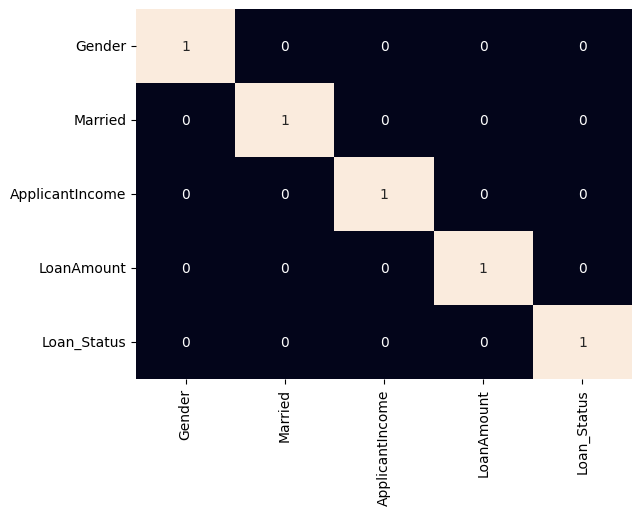

In [15]:
def encode_labels(data):
  for col in data.columns:
    if data[col].dtype == 'object':
      le = LabelEncoder()
      data[col] = le.fit_transform(data[col])
  return data

# Applying the funtion in whole column
df = encode_labels(df)

# Generate Heatmap
sns.heatmap(df.corr() > 0.8, annot = True, cbar = False)
plt.show()

## Data Preprocessing
here we will split the data for training and testing

In [16]:
features = df.drop('Loan_Status',axis = 1)
target = df['Loan_Status'].values
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.2,
                                                  random_state = 10)

#  As the data was highly  imbalanced we will balance it by adding repetitive rows of minority class
ros = RandomOverSampler(sampling_strategy = 'minority', random_state = 0)
X, Y = ros.fit_resample(X_train, Y_train)

X_train.shape, X.shape

((447, 4), (616, 4))

### nOW BY USING sTANDARD sCALING I WILL NORMALIZING THE DATA

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

## Model Development

In [19]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel= 'rbf')
model.fit(X,Y)

print('Training Accuracy: ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy: ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy:  0.6136363636363635
Validation Accuracy:  0.4908403026682596



### Model Evaluation
since its a clasification project we will be evaluating the model by using confusion matrix

I will first train the SVC model using the training data X and Y. Then, I will calculate the ROC AUC scores for both the training and validation datasets. The confusion matrix is built for the validation data by using the confusion_matrix function from sklearn.metrics. Finally, I will plot the confusion matrix using the plot_confusion_matrix function from the sklearn.metrics.plot_confusion_matrix submodule.

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))

print('Training ROC AUC Score: ', training_roc_auc)
print('Validation ROC AUC Score: ', validation_roc_auc)
print()

cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score:  0.6136363636363635
Validation ROC AUC Score:  0.4908403026682596



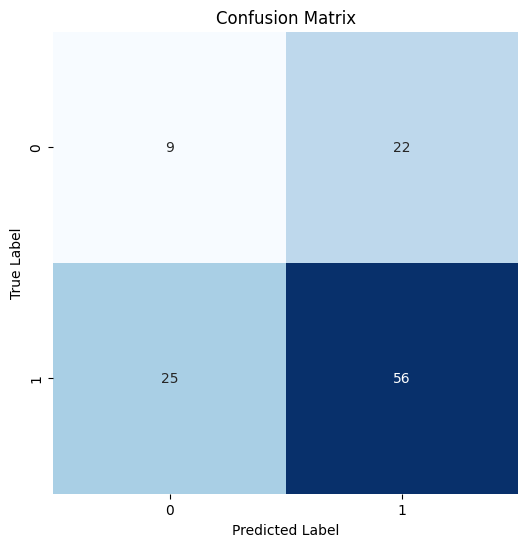

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Classification Report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))
print(by)

              precision    recall  f1-score   support

           0       0.26      0.29      0.28        31
           1       0.72      0.69      0.70        81

    accuracy                           0.58       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.59      0.58      0.59       112

Joseph Gathithi Wathome


As this dataset contains fewer features the performance of the model is not up to the mark maybe if we will use a better and big dataset we will be able to achieve better accuracy.